# import packages
Let's start by importing the following packages!
* requests
* BeautifulSoup
* seaborn
* matplotlib
* pandas
* re

In [408]:
# import package
import requests
from bs4 import BeautifulSoup
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import re

# crawler THSR information
Let's start to crawl the imformation of each station of THSR!
* Target web: [THSR Homepage](https://www.thsrc.com.tw)  
* Choose each station:
    1. Homepage -> Travel Information -> Stations
    2. choose different stations by changing url
* Task:
    1. crawler the name, address, operation hours and ticketing hours of each station
    2. organize into a DataFrame

In [409]:
# setting each station name and their url
url = 'https://www.thsrc.com.tw/'
response = requests.get(url)
response.encoding='utf-8' 
soup = BeautifulSoup(response.text, 'html.parser')
news = soup.find_all('ul', class_ = 'menu-lv3')[6]
new2 = news.find_all('li')


#events = news.find_all()
#ount = 0
# = []
station = []

for event in new2:
    station.append(event.find('a').string)
print(station) #每一站站名


a_station = news.find_all('a')
href_arr = []
for i in range(0,12):
    href_arr.append(a_station[i].get("href"))
print(href_arr) #每一站的網址

['南港站', '台北站', '板橋站', '桃園站', '新竹站', '苗栗站', '台中站', '彰化站', '雲林站', '嘉義站', '台南站', '左營站']
['/ArticleContent/2f940836-cedc-41ef-8e28-c2336ac8fe68', '/ArticleContent/977abb69-413a-4ccf-a109-0272c24fd490', '/ArticleContent/e6e26e66-7dc1-458f-b2f3-71ce65fdc95f', '/ArticleContent/fbd828d8-b1da-4b06-a3bd-680cdca4d2cd', '/ArticleContent/a7a04c89-900b-4798-95a3-c01c455622f4', '/ArticleContent/e8fc2123-2aaf-46ff-ad79-51d4002a1ef3', '/ArticleContent/3301e395-46b8-47aa-aa37-139e15708779', '/ArticleContent/38b8c40b-aef0-4d66-b257-da96ec51620e', '/ArticleContent/5f4c7bb0-c676-4e39-8d3c-f12fc188ee5f', '/ArticleContent/60831846-f0e4-47f6-9b5b-46323ebdcef7', '/ArticleContent/9c5ac6ca-ec89-48f8-aab0-41b738cb1814', '/ArticleContent/f2519629-5973-4d08-913b-479cce78a356']


In [410]:
# crawler the address of each station
#print('https://www.thsrc.com.tw/' + href_arr[0])
station_add = []
for i in range(0,12): #有12站
    response = requests.get('https://www.thsrc.com.tw/' + href_arr[i])
    response.encoding='utf-8' 
    soup = BeautifulSoup(response.text, 'html.parser')
    address = soup.find_all('a', class_ = 'google-map-link orange')
    for sta_add in address:
        print(sta_add.text)
    station_add.append(sta_add.text) #每一站的地址text加入list
#print(station_add)

台北市南港區南港路一段313號
台北市北平西路3號
新北市板橋區縣民大道二段7號
桃園市中壢區高鐵北路一段6號
新竹縣竹北市高鐵七路6號
苗栗縣後龍鎮高鐵三路268號
台中市烏日區站區二路8號
彰化縣田中鎮站區路二段99號
雲林縣虎尾鎮站前東路301號
嘉義縣太保市高鐵西路168號
台南市歸仁區歸仁大道100號
高雄市左營區高鐵路105號


In [411]:
# crawler the operation hours and ticketing hours of each station
operation_hours = []
ticketing_hours = []
for i in range(0,12): #共12站
    response = requests.get('https://www.thsrc.com.tw/' + href_arr[i])
    response.encoding='utf-8' 
    soup = BeautifulSoup(response.text, 'html.parser')
    a = soup.find_all('td', class_ = 'gray') #從class為gray的td取html碼
    count = 2
    for sta in a:
        if sta.string is not None: #若不為空
            #分兩個list依序丟入
            if count%2 == 0: 
                operation_hours.append(sta.string[5:])
            else:
                ticketing_hours.append(sta.string[5:])
            count += 1
print(operation_hours)
print(ticketing_hours)
#print(station_name)

['05:50 ~ 24:00', '06:00 ~ 24:00', '06:00 ~ 24:00', '06:20 ~ 23:45', '06:15 ~ 23:45', '06:05 ~ 23:45', '05:40 ~ 24:00', '06:20 ~ 24:00', '06:15 ~ 23:45', '06:00 ~ 23:45', '05:45 ~ 24:00', '05:25 ~ 24:00']
['05:50 ~ 末班車發車時間', '06:00 ~ 末班車發車時間', '06:00 ~ 末班車發車時間', '06:20 ~ 末班車發車時間 ', '06:15 ~ 末班車發車時間', '06:05 ~ 末班車發車時間', '05:40 ~ 末班車發車時間', '06:20~末班車發車時間', '06:15~末班車發車時間', '06:00~末班車發車時間', '05:45~末班車發車時間 ', '05:25~末班車發車時間 ']


In [412]:
# create a DataFrame
df_station_name = pd.DataFrame(station, columns = ['station'])
df_station_add = pd.DataFrame(station_add, columns = ['address'])
df_op_h = pd.DataFrame(operation_hours, columns = ['operation_hours'])
df_tic_h = pd.DataFrame(ticketing_hours, columns = ['ticketing_hours'])
df_table = pd.concat([df_station_name, df_station_add, df_op_h, df_tic_h], axis = 1)
#合併list
df_table

,station,address,operation_hours,ticketing_hours
0,南港站,台北市南港區南港路一段313號,05:50 ~ 24:00,05:50 ~ 末班車發車時間
1,台北站,台北市北平西路3號,06:00 ~ 24:00,06:00 ~ 末班車發車時間
2,板橋站,新北市板橋區縣民大道二段7號,06:00 ~ 24:00,06:00 ~ 末班車發車時間
3,桃園站,桃園市中壢區高鐵北路一段6號,06:20 ~ 23:45,06:20 ~ 末班車發車時間
4,新竹站,新竹縣竹北市高鐵七路6號,06:15 ~ 23:45,06:15 ~ 末班車發車時間
5,苗栗站,苗栗縣後龍鎮高鐵三路268號,06:05 ~ 23:45,06:05 ~ 末班車發車時間
6,台中站,台中市烏日區站區二路8號,05:40 ~ 24:00,05:40 ~ 末班車發車時間
7,彰化站,彰化縣田中鎮站區路二段99號,06:20 ~ 24:00,06:20~末班車發車時間
8,雲林站,雲林縣虎尾鎮站前東路301號,06:15 ~ 23:45,06:15~末班車發車時間
9,嘉義站,嘉義縣太保市高鐵西路168號,06:00 ~ 23:45,06:00~末班車發車時間


# Crawler GDP and CPI
Let's start to crawl GDP and CPI!
* Target web: 
    1. [Wiki GDP](https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal))  
    2. [Wiki CPI](https://en.wikipedia.org/wiki/Corruption_Perceptions_Index)
* Task:
    1. crawler GDP table (top 50: United States ~ New Zealand)
    2. organize into a DataFrame (columns: Country, Region, IMF_Estimate, IMF_Year, United_Nations_Estimate, United_Nations_Year, World_Bank_Estimate, World_Bank_Year)
    3. crawler CPI table which contains country and 2020 CPI (top 100: Denmark ~ Suriname)
    4. organize into a DataFrame (columns: Country, CPI_2020)
    5. merge GDP(DataFrame) and CPI(DataFrame), based on Country of GDP
    6. plot and text the names of GDP top 10 countrys

In [413]:
# crawler GDP
import locale
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')

url = 'https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)'
response = requests.get(url)
response.encoding='utf-8' 
soup = BeautifulSoup(response.text, 'html.parser')

index = []
c = soup.find('table', class_ = 'static-row-numbers')


Country = []
Region = []
IMF_Estimate = []
IMF_Year = []
United_Nations_Estimate = []
United_Nations_Year = []
World_Bank_Estimate = []
World_Bank_Year = []

#td = c.find_all('td')[3]
#print(td.text)
#td = c.find_all('td')[399]

#每8個循環回到同一行
#分別取每個值並輪流丟入該attribute的list中

for i in range(0, 400, 8):
    td = c.find_all('td')[i]
    Country.append(td.text[1:])
#print(Country)

for i in range(1, 400, 8):
    td = c.find_all('td')[i]
    Region.append(td.text)
#print(Region)

for i in range(2, 400, 8):
    td = c.find_all('td')[i]
    IMF_Estimate.append(td.text)
#print(IMF_Estimate)

for i in range(3, 400, 8):
    td = c.find_all('td')[i]
    IMF_Year.append(td.text[-4:])
#print(IMF_Year)

for i in range(4, 400, 8):
    td = c.find_all('td')[i]
    United_Nations_Estimate.append(td.text)
#print(United_Nations_Estimate)

for i in range(5, 400, 8):
    td = c.find_all('td')[i]
    United_Nations_Year.append(td.text[-4:])
#print(United_Nations_Year)

for i in range(6, 400, 8):
    td = c.find_all('td')[i]
    World_Bank_Estimate.append(locale.atof(td.text))
#print(World_Bank_Estimate)

for i in range(7, 400, 8):
    td = c.find_all('td')[i]
    World_Bank_Year.append(td.text[:4])
#print(World_Bank_Year)

In [414]:
# create GDP DataFrame
df_Country = pd.DataFrame(Country, columns = ['Country'])
df_Region = pd.DataFrame(Region, columns = ['Region'])
df_IMF_Estimate = pd.DataFrame(IMF_Estimate, columns = ['IMF_Estimate'])
df_IMF_Year = pd.DataFrame(IMF_Year, columns = ['IMF_Year'])
df_United_Nations_Estimate = pd.DataFrame(United_Nations_Estimate, columns = ['United_Nations_Estimate'])
df_United_Nations_Year = pd.DataFrame(United_Nations_Year, columns = ['United_Nations_Year'])
df_World_Bank_Estimate = pd.DataFrame(World_Bank_Estimate, columns = ['World_Bank_Estimate'])
df_World_Bank_Year = pd.DataFrame(World_Bank_Year, columns = ['World_Bank_Year'])
df_gdp = pd.concat([df_Country, df_Region, df_IMF_Estimate, df_IMF_Year, df_United_Nations_Estimate, df_United_Nations_Year, df_World_Bank_Estimate, df_World_Bank_Year], axis = 1)
#合併每個list成dataframe
df_gdp

,Country,Region,IMF_Estimate,IMF_Year,United_Nations_Estimate,United_Nations_Year,World_Bank_Estimate,World_Bank_Year
0,United States,Americas,"22,675,271",2021,"21,433,226",2019,20936600.0,2020
1,China,Asia,"16,642,318",2021,"14,342,933",2019,14722731.0,2020
2,Japan,Asia,"5,378,136",2021,"5,082,465",2019,4975415.0,2020
3,Germany,Europe,"4,319,286",2021,"3,861,123",2019,3806060.0,2020
4,United Kingdom,Europe,"3,124,650",2021,"2,826,441",2019,2707744.0,2020
5,India,Asia,"3,049,704",2021,"2,891,582",2019,2622984.0,2020
6,France,Europe,"2,938,271",2021,"2,715,518",2019,2603004.0,2020
7,Italy,Europe,"2,106,287",2021,"2,003,576",2019,1886445.0,2020
8,Canada,Americas,"1,883,487",2021,"1,741,496",2019,1643408.0,2020
9,South Korea,Asia,"1,806,707",2021,"1,646,539",2019,1630525.0,2020


In [415]:
# crawler CPI

url = 'https://en.wikipedia.org/wiki/Corruption_Perceptions_Index'
response = requests.get(url)
response.encoding='utf-8' 
soup = BeautifulSoup(response.text, 'html.parser')


Country = []
CPI_2020 = []
c = soup.find('table', class_ = 'sortable') #從大table找
#td = c.find_all('td')[1900]
#print(td)
for i in range(1, 1900, 19): #每19個循環回到同一行(country為第一行)
    td = c.find_all('td')[i]
    Country.append(td.text[1:])
#print(Country)

for i in range(2, 1900, 19): #每19個循環回到同一行(cpi為第二行)
    td = c.find_all('td')[i]
    CPI_2020.append(float(td.text))
#print(CPI_2020)

In [416]:
# CPI DataFrame

df_Country = pd.DataFrame(Country, columns = ['Country'])
df_CPI_2020 = pd.DataFrame(CPI_2020, columns = ['CPI_2020'])
df_CPI = pd.concat([df_Country, df_CPI_2020], axis = 1) #兩個list製成dataframe
df_CPI

,Country,CPI_2020
0,Denmark,88.0
1,New Zealand,88.0
2,Finland,85.0
3,Singapore,85.0
4,Sweden,85.0
...,...,...
95,Kazakhstan,38.0
96,Peru,38.0
97,Serbia,38.0
98,Sri Lanka,38.0


In [417]:
# merge GDP and CPI DataFrame

df_row = pd.merge(df_gdp, df_CPI, how='left', left_on='Country', right_on='Country') #合併兩dataframe
df_merge_frame = df_row.dropna(axis=0, how='any') #將nan的值刪掉
df_merge_frame

,Country,Region,IMF_Estimate,IMF_Year,United_Nations_Estimate,United_Nations_Year,World_Bank_Estimate,World_Bank_Year,CPI_2020
0,United States,Americas,"22,675,271",2021,"21,433,226",2019,20936600.0,2020,67.0
1,China,Asia,"16,642,318",2021,"14,342,933",2019,14722731.0,2020,42.0
2,Japan,Asia,"5,378,136",2021,"5,082,465",2019,4975415.0,2020,74.0
3,Germany,Europe,"4,319,286",2021,"3,861,123",2019,3806060.0,2020,80.0
4,United Kingdom,Europe,"3,124,650",2021,"2,826,441",2019,2707744.0,2020,77.0
5,India,Asia,"3,049,704",2021,"2,891,582",2019,2622984.0,2020,40.0
6,France,Europe,"2,938,271",2021,"2,715,518",2019,2603004.0,2020,69.0
7,Italy,Europe,"2,106,287",2021,"2,003,576",2019,1886445.0,2020,53.0
8,Canada,Americas,"1,883,487",2021,"1,741,496",2019,1643408.0,2020,77.0
9,South Korea,Asia,"1,806,707",2021,"1,646,539",2019,1630525.0,2020,61.0


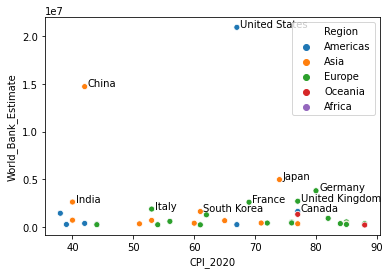

In [418]:
# plot

df = pd.DataFrame(df_merge_frame)
df["Region"]
group_region = df.groupby("Region") #以region分類
#for key,value in group_region:
 #   print(key)
  #  print(value)

sns.scatterplot(data=df_merge_frame, x="CPI_2020", y="World_Bank_Estimate", hue="Region") #畫圖


mark = df_merge_frame.head(10) #只有前10筆資料


def label_point(x, y, val, ax): #加標籤
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.5, point['y']+.5, str(point['val']))

label_point(mark.CPI_2020, mark.World_Bank_Estimate, mark.Country, plt.gca())